In [ ]:
import mediapipe
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
import hpe
from torch.utils.data import Dataset
import torch
import torch.nn as nn
import numpy as np
import os
from torch.utils.data import Dataset
import torch
from PIL import Image
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
import albumentations as A
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
from glob import glob
import segmentation_models_pytorch as smp
import torch.nn.functional as F
import cv2
import time 
device =torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [50]:
# img_path = "/home/nipun/Pictures/Webcam/normal_eye.jpg"



# Hd Logitech
# img_path = "/home/nipun/Music/Real-ESRGAN/hd_logitech.png"


# Audsom Camera
# img_path = "/home/nipun/Pictures/Webcam/AusDom_Camera/2023-06-19-143925.jpg"

# img_path = "/home/nipun/Pictures/Webcam/AusDom_Camera/2023-06-19-143933.jpg"

img_path = "/home/nipun/Pictures/Webcam/AusDom_Camera/2023-06-19-143951.jpg"

# img_path = "/home/nipun/Pictures/Webcam/AusDom_Camera/2023-06-19-143958.jpg"

# img_path = "/home/nipun/Pictures/Webcam/AusDom_Camera/2023-06-19-144004.jpg"



# Other Camera

# img_path = "/home/nipun/Pictures/Webcam/Other_Camera/2023-06-19-143426.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Other_Camera/2023-06-19-143452.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Other_Camera/2023-06-19-143505.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Other_Camera/2023-06-19-143519.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Other_Camera/2023-06-19-143528.jpg"


# img_path = "/home/nipun/Documents/Uni_Malta/Datasets/gi4e_database/images/004_09.png"

img_path = "/home/nipun/Documents/Uni_Malta/Datasets/I2HEAD/user_01/65_points_free/position_index_60/image_01/01.png"


eye_segmentation_path = "/home/nipun/Documents/Uni_Malta/LuminEye/LuminEye-Experiments/U2net/U2NET_MULTICLASS_IMG_256_DIC_batch_8/Miche_model_2023_04_11_22:14:26_val_iou0.900.pt" 

model = torch.load(eye_segmentation_path,map_location=device)

RESIZE_AMT = 256

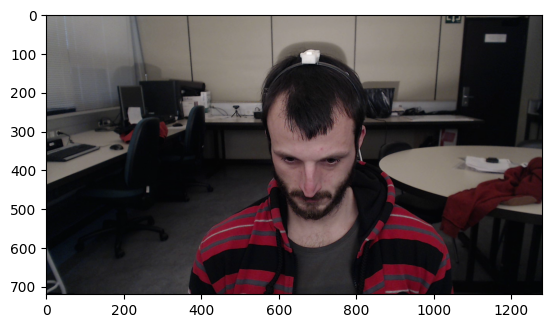

In [51]:
img_base= cv2.imread(img_path)
plt.imshow(img_base[:,:,::-1])

In [52]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

In [53]:
	
results = face_mesh.process(img_base)
landmarks = results.multi_face_landmarks[0]

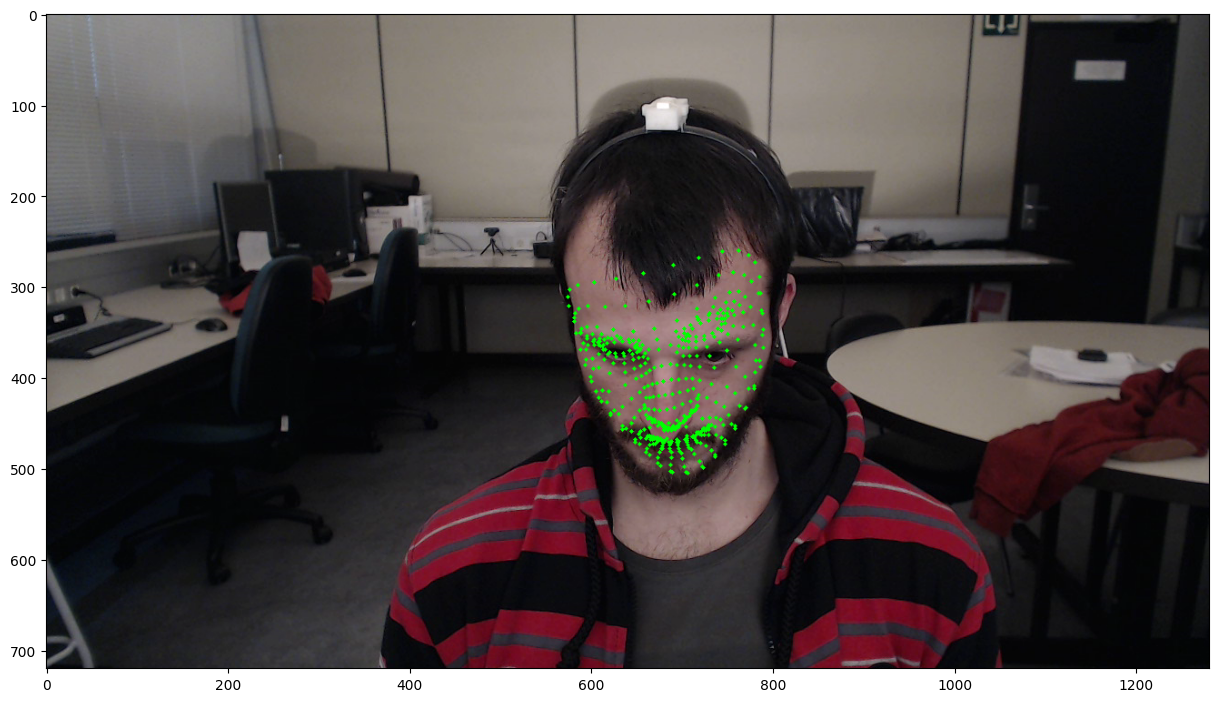

In [54]:
img_1 = img_base.copy()
xs = [];ys = [];zs = [];
for landmark in landmarks.landmark:
    x = landmark.x
    y = landmark.y
    # z = landmark.z
    
    relative_x = int(x * img_base.shape[1])
    relative_y = int(y * img_base.shape[0])
    
    cv2.circle(img_1,(relative_x,relative_y),radius = 2,color=(0,255,0),thickness=-1)

plt.figure(figsize=(15,15))
plt.imshow(img_1[:,:,::-1])

In [55]:
# Convert MediaPipe Array to Numpy Array:
shape_arr = []


for landmark in landmarks.landmark:
    x = landmark.x
    y = landmark.y
    
    relative_x = int(x * img_base.shape[1])
    relative_y = int(y * img_base.shape[0])
    
    
    shape_arr.append([relative_x, relative_y])


shape_arr = np.array(shape_arr) #( 468 ,2)

In [56]:
# MeanWidth 
# shape_arr[127]
# shape_arr[356
#           ]

# print(**shape_arr[127])
# cv2.line(img_1,(shape_arr[127][0],shape_arr[127][1]),(shape_arr[356][0],shape_arr[356][1]),(0,255,0),3 )

meanWidtch = shape_arr[356][0] - shape_arr[127][0]


In [57]:
imgl = img_base.copy()
coordinates_of_symmetric = [9,8,
                            168,
                            6,
                            197,
                            195,
                            5,
                            4,
                            1,
                            19,
                            94,
                            2,
                            164,
                            0,
                            11,
                            12,
                            13,
                            14,
                            15, 16, 17, 18]


for num in coordinates_of_symmetric:
    
    cv2.circle(imgl,(shape_arr[num][0],shape_arr[num][1]),radius = 2,color = 
               (255,0,0),thickness =-1)

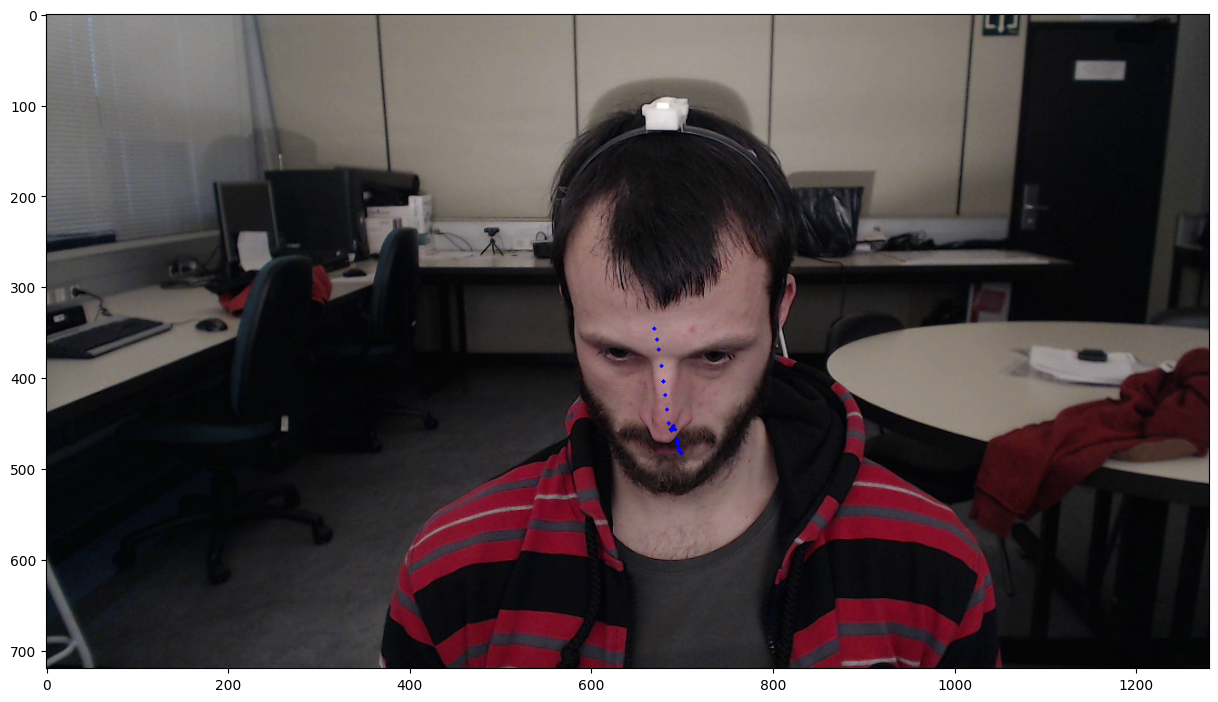

In [58]:
fig = plt.figure(figsize=(15,15))
plt.imshow(imgl[:,:,::-1])

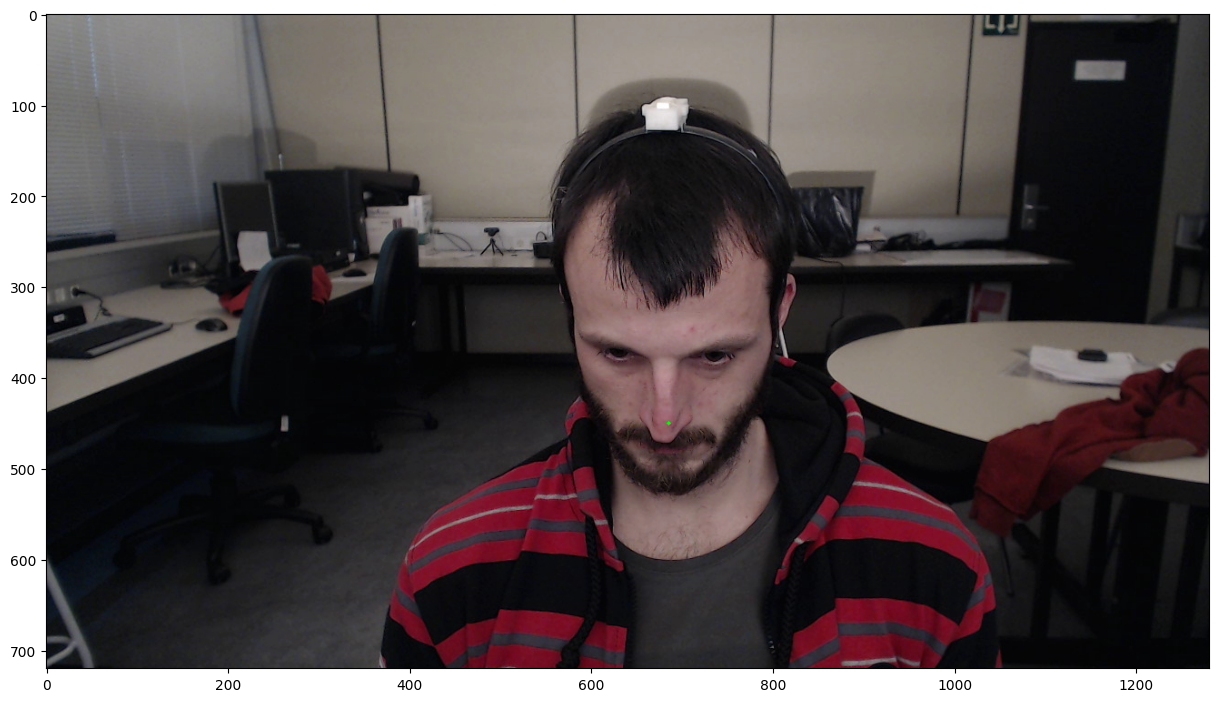

In [59]:
imgp = img_base.copy()
piyot_y = shape_arr[4]

cv2.circle(imgp,(piyot_y[0],piyot_y[1]),radius = 2,color = 
               (0,255,0),thickness =-1)



fig = plt.figure(figsize=(15,15))
plt.imshow(imgp[:,:,::-1])
plt.show()

In [62]:
img_2 = img_base.copy()
lEyeC = []
for source_idx,target_idx in  mp_face_mesh.FACEMESH_LEFT_EYE:
    
    print(source_idx)
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
    
    relative_source = (int(source.x * img_base.shape[1]),int(source.y * img_base.shape[0]))
    relative_target = (int(target.x * img_base.shape[1]),int(target.y * img_base.shape[0]))
    
    
    
    lEyeC.append(relative_source)
    lEyeC.append(relative_target)
    
    cv2.circle(img_2,relative_source,radius = 5,color = 
               (0,0,255),thickness =-1)
    
    cv2.circle(img_2,relative_target,radius = 5,color = 
               (255,0,0),thickness =-1)

374
390
249
385
373
263
387
381
384
466
386
388
263
380
398
382


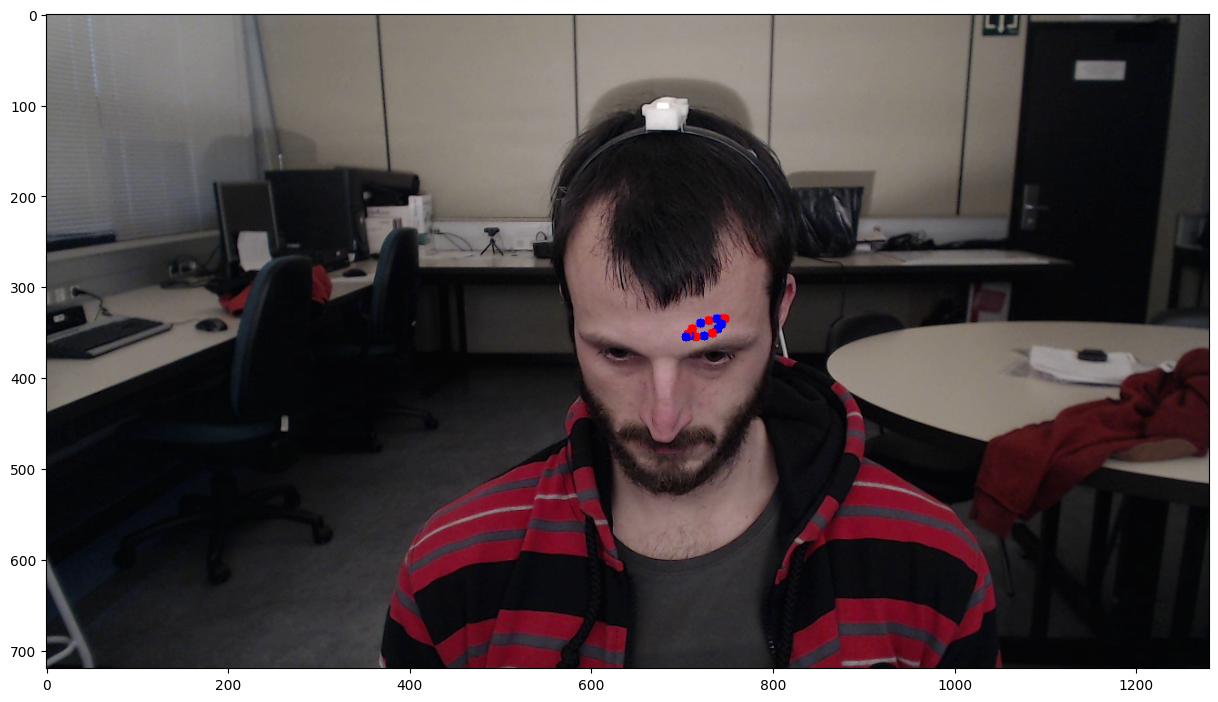

In [63]:
fig = plt.figure(figsize=(15,15))
plt.imshow(img_2[:,:,::-1])
plt.show()

In [64]:
sortedX = sorted(lEyeC,key=lambda x:x[0])
sortedY = sorted(lEyeC,key=lambda x:x[1])

In [65]:
minX = sortedX[0][0]
maxX = sortedX[-1][0]

minY = sortedY[0][1]
maxY = sortedY[-1][1]

In [66]:
img_3 = img_base.copy()

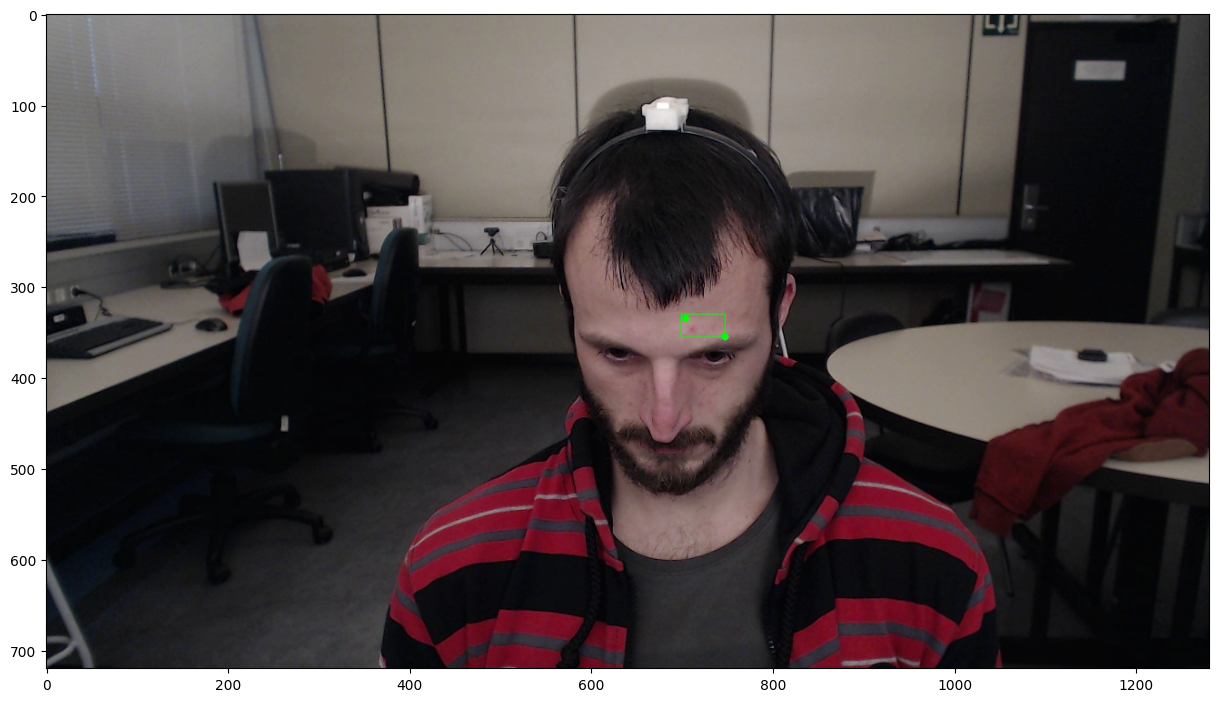

In [67]:
cv2.circle(img_3,(minX,minY),4,(0,255,0),-1)
cv2.circle(img_3,(maxX,maxY),4,(0,255,0),-1)

cv2.rectangle(img_3,(minX-5,minY-5),(maxX,maxY),(0,255,0),1)

fig = plt.figure(figsize=(15,15))
plt.imshow(img_3[:,:,::-1])
plt.show()

In [68]:
img_2 = img_base.copy()
rEyeC = []
for source_idx,target_idx in  mp_face_mesh.FACEMESH_RIGHT_EYE:
    
    source = landmarks.landmark[source_idx]
    target = landmarks.landmark[target_idx]
    
    relative_source = (int(source.x * img_base.shape[1]),int(source.y * img_base.shape[0]))
    relative_target = (int(target.x * img_base.shape[1]),int(target.y * img_base.shape[0]))
    
    
    
    rEyeC.append(relative_source)
    rEyeC.append(relative_target)

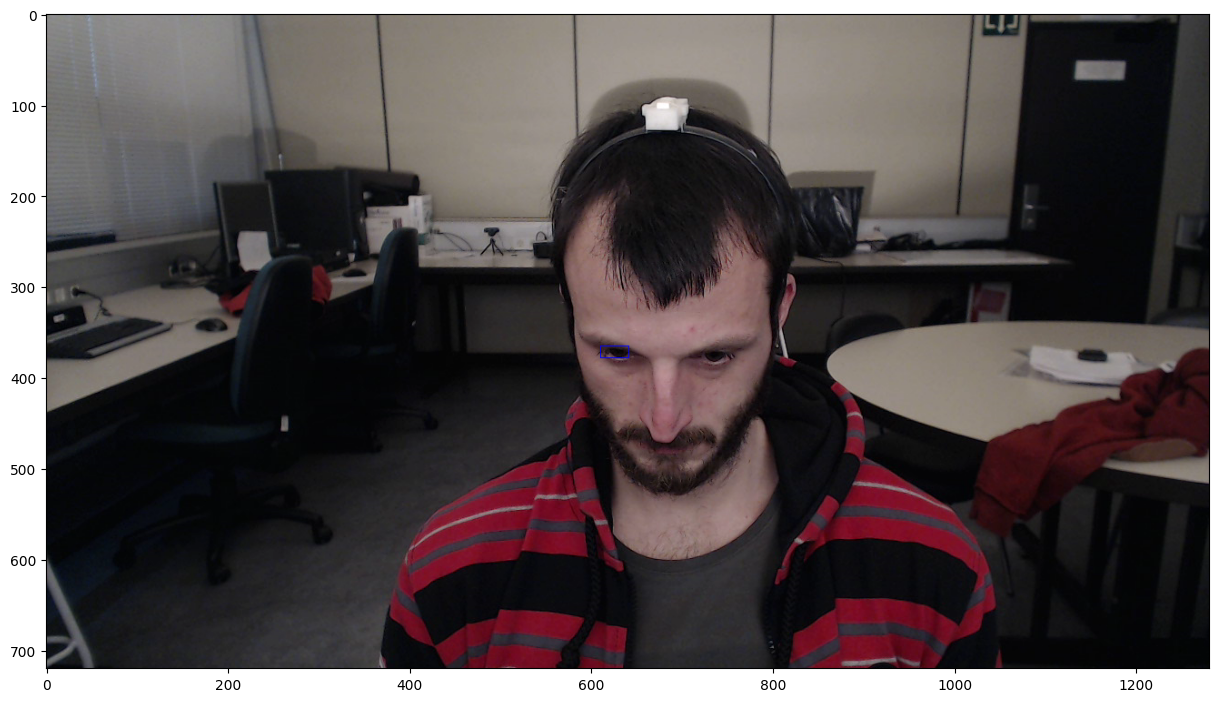

In [69]:
sortedX = sorted(rEyeC,key=lambda x:x[0])
sortedY = sorted(rEyeC,key=lambda x:x[1])

minX = sortedX[0][0] 
maxX = sortedX[-1][0] - 10 

minY = sortedY[0][1] + 5
maxY = sortedY[-1][1] +5


cv2.rectangle(img_2,(minX,minY),(maxX,maxY),(255,0,0),1)

fig = plt.figure(figsize=(15,15))
plt.imshow(img_2[:,:,::-1])
plt.show()

In [70]:
img_landmark = img_base.copy()

lEyeTopLeftCorner = shape_arr[70]
rEyeTopLeftCorner = shape_arr[285]





lEyeBottomRight = shape_arr[133] 

rEyeBottomRight  = shape_arr[446]

In [71]:
#// Left eyebrow.
#46, 53, 53, 52, 52, 65, 65, 55, 70, 63, 63, 105, 105, 66, 66, 107,

#// Right eyebrow.
#276, 283, 283, 282, 282, 295, 295, 285, 300, 293, 293, 334, 334, 296, 296,
#336,



# // Left eye.
# 33, 7, 7, 163, 163, 144, 144, 145, 145, 153, 153, 154, 154, 155, 155, 133,
# 33, 246, 246, 161, 161, 160, 160, 159, 159, 158, 158, 157, 157, 173, 173,
# 133,


# // Right eye.
# 263, 249, 249, 390, 390, 373, 373, 374, 374, 380, 380, 381, 381, 382, 382,
# 362, 263, 466, 466, 388, 388, 387, 387, 386, 386, 385, 385, 384, 384, 398,
# 398, 362,


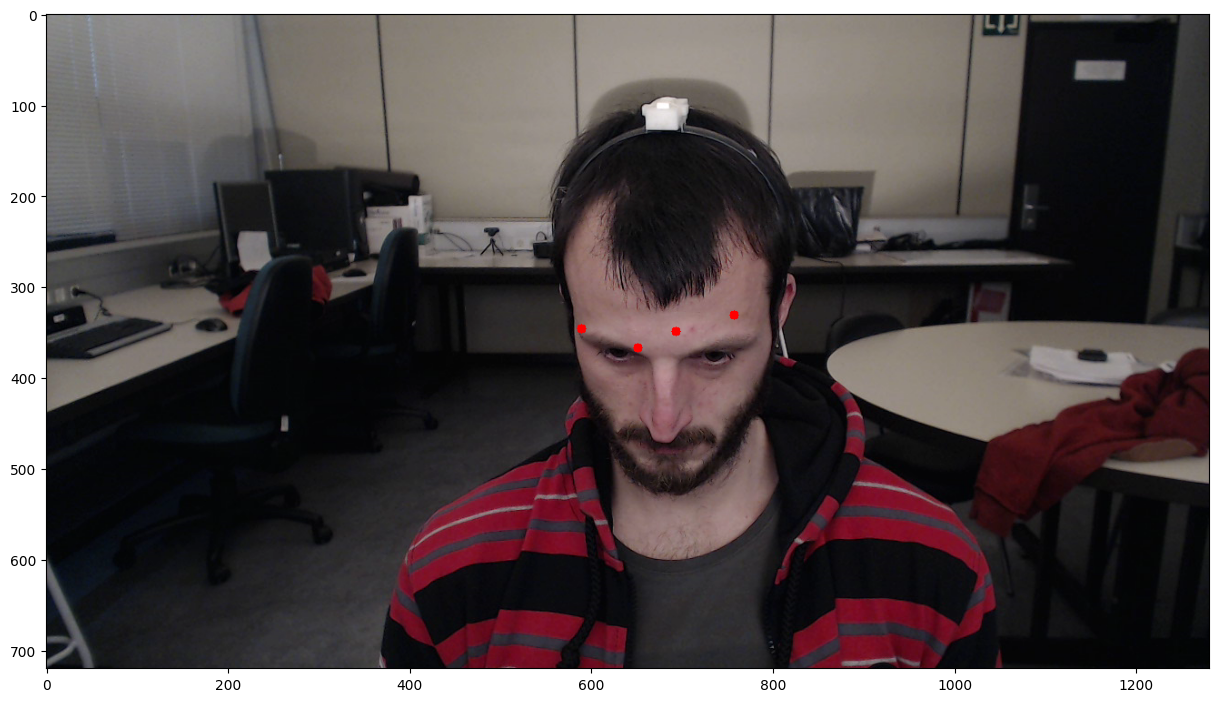

In [72]:
cv2.circle(img_landmark,lEyeTopLeftCorner,5,(0,0,255),-1)
cv2.circle(img_landmark,rEyeTopLeftCorner,5,(0,0,255),-1)

cv2.circle(img_landmark,lEyeBottomRight,5,(0,0,255),-1)
cv2.circle(img_landmark,rEyeBottomRight,5,(0,0,255),-1)

fig = plt.figure(figsize=(15,15))
plt.imshow(img_landmark[:,:,::-1])
plt.show()

In [44]:
def cropped_image(img, shape_array, padded_amt=30, enhance=True):
    """Cropped eye region and enhance it according to the requirement

    Args:
        img (__numpy__): _Original Image_
        shape_array (_numpy_): _FaceLandMark locations_
        padded_amt (int, optional): _padding size_. Defaults to 20.
        enhance (bool, optional): _applying SISR_. Defaults to True.
    """

    Leye = {"top_left": shape_array[70], "bottom_right": shape_array[133]}

    Reye = {"top_left": shape_array[285] ,
            "bottom_right": shape_array[446]}

    left_eye = img[Leye["top_left"][1]:Leye["bottom_right"][1] +
                   padded_amt, Leye["top_left"][0]:Leye["bottom_right"][0]]

    right_eye = img[Reye["top_left"][1]:Reye["bottom_right"][1] +
                    padded_amt, Reye["top_left"][0]:Reye["bottom_right"][0]]

    if enhance:
        left_eye, _ = GAN_MODEL.enhance(left_eye)
        right_eye, _ = GAN_MODEL.enhance(right_eye)

    return left_eye, right_eye,Leye,Reye

In [45]:
left_eye, right_eye,Leye,Reye = cropped_image(img_base, shape_arr,enhance=False)




cv2.imwrite("left_eye.png",left_eye)
cv2.imwrite("right_eye.png",right_eye)

True

In [46]:
left_eye_img = cv2.cvtColor(left_eye,cv2.COLOR_BGR2RGB)
right_eye_img = cv2.cvtColor(right_eye,cv2.COLOR_BGR2RGB)

resized_left_eye_img = cv2.resize(left_eye_img,(RESIZE_AMT,RESIZE_AMT))
resized_right_eye_img = cv2.resize(right_eye_img,(RESIZE_AMT,RESIZE_AMT))

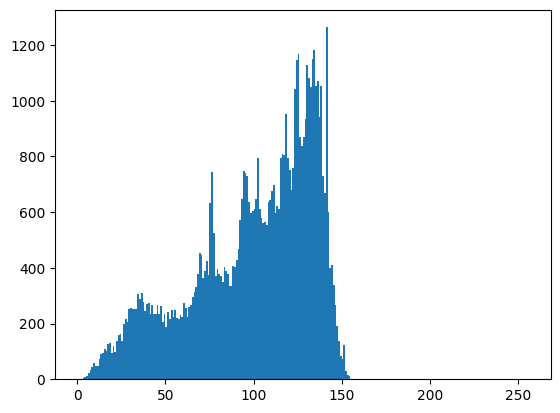

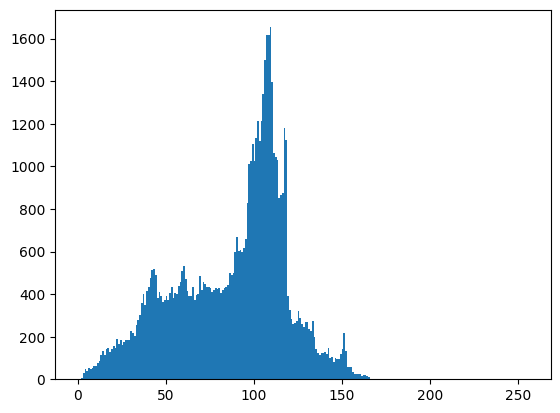

In [47]:
hist_l = cv2.cvtColor(resized_left_eye_img,cv2.COLOR_RGB2GRAY)
hist_r = cv2.cvtColor(resized_right_eye_img,cv2.COLOR_RGB2GRAY)

plt.hist(hist_l.ravel(),256,[0,256]); plt.show()
plt.hist(hist_r.ravel(),256,[0,256]); plt.show()

(56, 51, 3)


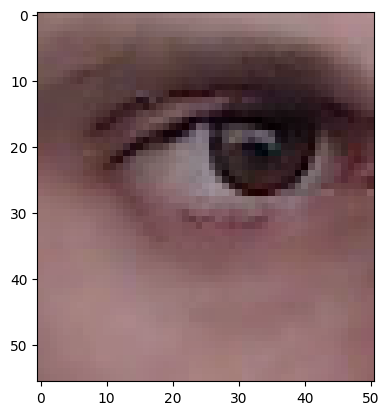

In [48]:
plt.imshow(left_eye_img)
print(left_eye_img.shape)

(36, 45, 3)


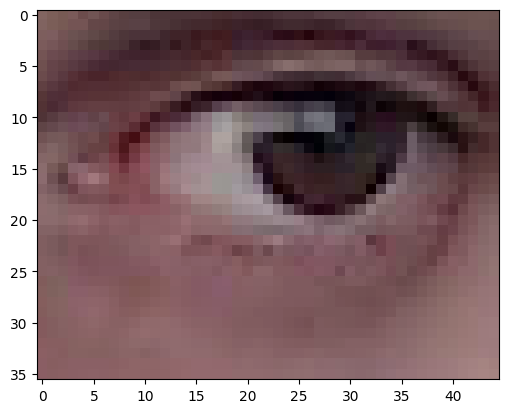

In [49]:
plt.imshow(right_eye_img)
print(right_eye_img.shape)

In [ ]:
l_h,l_w,_ = left_eye_img.shape

In [ ]:
#
transform = A.Compose([
    A.Resize(RESIZE_AMT,RESIZE_AMT),
    A.augmentations.transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

aug_r = transform(image=right_eye_img)

aug_l = transform(image=left_eye_img)

l_img = aug_l["image"]
r_img = aug_r["image"]

In [ ]:
def predict_image_mask(model,image):
    
    
    image = image.to(device)
    model.eval()
    
    # print(f"Original Image shape: {image.size()}")
    
    # print(f"Ground Truth Mask shape: {mask.size()}")
    
    with torch.no_grad():
        
        softmax = nn.Softmax(dim=1)
        image = image.unsqueeze(0)
        # mask = mask.unsqueeze(0)
        
        model_output,_,_,_,_,_,_ = model(image)
        
        
        output = softmax(model_output)
    
        
        masked = torch.argmax(output,dim=1)
        masked = masked.cpu().squeeze(0)
    return masked

In [ ]:
pred_mask_l = predict_image_mask(model,l_img)

pred_mask_r = predict_image_mask(model,r_img)

In [ ]:

img_mask = img_base.copy()

In [ ]:
n_classes = 3
batch_size = 1

colors = [ [  0,   0,   0],[0,255,0],[0,0,255]]
label_colours = dict(zip(range(n_classes), colors))

valid_classes = [0,85, 170]
class_names = ["Background","Pupil","Iris"]
class_map = dict(zip(valid_classes, range(len(valid_classes))))



def decode_segmap(temp):
    #convert gray scale to color
    temp=temp.numpy()
    r = temp.copy()
    g = temp.copy()
    b = temp.copy()
    for l in range(0, n_classes):
        r[temp == l] = label_colours[l][0]
        g[temp == l] = label_colours[l][1]
        b[temp == l] = label_colours[l][2]

    rgb = np.zeros((temp.shape[0], temp.shape[1], 3))
    rgb[:, :, 0] = r / 255.0
    rgb[:, :, 1] = g / 255.0
    rgb[:, :, 2] = b / 255.0
    return rgb

In [ ]:
# median = cv2.medianBlur(gray, 5)
        
pred_image_l = decode_segmap(pred_mask_l) * 255

pred_image_l = pred_image_l.astype(np.uint8)
# print()

# print(pred_image.shape)
edge_detected_image_l = cv2.Canny(pred_image_l, 0, 200)

plt.imshow(edge_detected_image_l)
plt.show()



contours, hierarchy = cv2.findContours(edge_detected_image_l, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)




max_area = {}

for contour in contours:
    
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    # print(area)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        
        
        max_area[area] = contour
        

x = sorted(max_area,key = lambda x:x)


max_contour = max_area[x[-1]]
min_contour = max_area[x[1]]


cv2.drawContours(resized_left_eye_img,[max_contour],0,(0,0,255),1)
cv2.drawContours(resized_left_eye_img,[min_contour],0,(0,255,0),1)




plt.imshow(resized_left_eye_img)
plt.show()



for coords in min_contour:
   
    
    coords[0][0] = Leye["top_left"][0] + ((coords[0][0]/RESIZE_AMT) * l_w)
    coords[0][1] = Leye["top_left"][1] +  ((coords[0][1]/RESIZE_AMT) * l_h)



for coords in max_contour:
    
    
    coords[0][0] = Leye["top_left"][0] +  ((coords[0][0]/RESIZE_AMT) * l_w)
    coords[0][1] =  Leye["top_left"][1] +  ((coords[0][1]/RESIZE_AMT) * l_h)
    
    

    
cv2.drawContours(img_mask ,[max_contour],0,(0,0,255),1)
cv2.drawContours(img_mask ,[min_contour],0,(0,255,0),1)

print("Left Eye")


In [ ]:
# Right Eye     

r_h,r_w,_ = right_eye_img.shape   
pred_image_r = decode_segmap(pred_mask_r) * 255

pred_image_r = pred_image_r.astype(np.uint8)
# print()

# print(pred_image.shape)
edge_detected_image_r = cv2.Canny(pred_image_r, 0, 200)

plt.imshow(edge_detected_image_r)
plt.show()


contours, hierarchy = cv2.findContours(edge_detected_image_r, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


max_area = {}

for contour in contours:
    
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    # print(area)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        
        
        max_area[area] = contour
        

x = sorted(max_area,key = lambda x:x)


max_contour = max_area[x[-1]]
min_contour = max_area[x[1]]


cv2.drawContours(resized_right_eye_img,[max_contour],0,(0,0,255),1)
cv2.drawContours(resized_right_eye_img,[min_contour],0,(0,255,0),1)




plt.imshow(resized_right_eye_img)
plt.show()


for coords in min_contour:
   
    
    coords[0][0] = Reye["top_left"][0] + ((coords[0][0]/RESIZE_AMT) * r_w)
    coords[0][1] = Reye["top_left"][1] +  ((coords[0][1]/RESIZE_AMT) * r_h)



for coords in max_contour:
    
    
    coords[0][0] = Reye["top_left"][0] +  ((coords[0][0]/RESIZE_AMT) * r_w)
    coords[0][1] =  Reye["top_left"][1] +  ((coords[0][1]/RESIZE_AMT) * r_h)
    
    

    
cv2.drawContours(img_mask ,[max_contour],0,(0,0,255),1)
cv2.drawContours(img_mask ,[min_contour],0,(0,255,0),1)


print("Right Eye")




In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img_mask[:,:,::-1])

In [ ]:
cnt = max(contours, key = cv2.contourArea) # finding contour with #maximum area
M = cv2.moments(cnt)
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [ ]:
ori_h,ori_w,_ =left_eye.shape

In [ ]:
ori_cx = int(Leye["top_left"][0] +((cx/RESIZE_AMT) * ori_w))
ori_cy = int(Leye["top_left"][1] + ((cy/RESIZE_AMT) * ori_h))

print(f"Rescaled CX AND CY Coordinate {ori_cx,ori_cy}")



cv2.circle(img_mask,(ori_cx,ori_cy),1,(0,0,255),-1)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img_mask[:,:,::-1])

In [ ]:
def findMinEyeX(cntour):
    minVal = cnt[0][0][0]
    for i in cntour:
        if i[0][0] < minVal:
            minVal = i[0][0]
            
    return minVal
        
minValOfIris = findMinEyeX(cnt)


# print(minValOfIris)

minValOfIris = Leye["top_left"][0] +((minValOfIris/RESIZE_AMT) * ori_w)

radius_of_iris = ori_cx-minValOfIris

print(radius_of_iris)

In [ ]:
cv2.line(img_mask, (ori_cx,ori_cy), (int(ori_cx+radius_of_iris),ori_cy), (0,255,0),2)

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img_mask[:,:,::-1])

In [ ]:
# EyeBall Radius
eyeBallRadius = (12.2/5.9) * radius_of_iris

print(eyeBallRadius)

In [ ]:
def findRadiusIris(pred_mask,eye_w,eye_h,margin):
    
    pred_image = decode_segmap(pred_mask) * 255
    pred_image = pred_image.astype(np.uint8)
    edge_detected_image = cv2.Canny(pred_image, 0, 200)
    
    contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    
    
    cnt = max(contours, key = cv2.contourArea) # finding contour with #maximum area
    M = cv2.moments(cnt)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    
    
    ori_cx = int(margin["top_left"][0] +((cx/RESIZE_AMT ) * eye_w))
    ori_cy = int(margin["top_left"][1] + ((cy/RESIZE_AMT ) * eye_h))
    
    
    
    minValOfIris = findMinEyeX(cnt)
    
    
    minValOfIris = margin["top_left"][0] +((minValOfIris/RESIZE_AMT ) * eye_w)
    
    
    
    radius_of_iris = ori_cx-minValOfIris
    
    
    return radius_of_iris,ori_cx,ori_cy

In [ ]:
radius_of_iris,ori_cx,ori_cy = findRadiusIris(pred_mask_l,left_eye.shape[1],left_eye.shape[0],Leye)

In [ ]:
iris_x = cx
iris_y = cy



innerEyeCorner_x,innerEyeCorner_y = shape_arr[133][0],shape_arr[133][1]

outerEyeCorner_x,outerEyeCorner_y = shape_arr[33][0],shape_arr[33][1]

In [ ]:
import hpe

r = hpe.compute_rotation(shape_arr)
print(f"Rotation Matrix {r}")

In [ ]:
yaw, pitch, roll, yaw_deg, pitch_deg, roll_deg = hpe.compute_angles(
        r, 10)

print(yaw)
print(pitch)
print(roll)
print(yaw_deg)
print(pitch_deg)
print(roll_deg)


theta = yaw
phi = pitch

In [ ]:
# Compute the rotated inner eye corner x-coordinate, for each eye
def cornerX(innerEyeCorner_x, symmAxis_x, R, theta):
    
    # Calculate the eye corner position with respect to the symmetry axis of the face
    x = innerEyeCorner_x - symmAxis_x
    
    # Calculate the angle between the eye corner and the symmetry axis of the face
    wc = math.asin(x / R)
    
    # Calculate the new image position of the eye corner after rotating by the head yaw angle
    innerEyeCornerRot_x = R * math.sin(wc + math.radians(theta))
    
    return innerEyeCornerRot_x


# Compute the rotated inner eye corner y-coordinate, for each eye
def cornerY(innerEyeCorner_y, pivot_y, phi):
    
    # Calculate the eye corner position with respect to a pivot point
    y = innerEyeCorner_y - pivot_y
    
    # Calculate the new image position of the eye corner after rotating by the head pitch angle
    innerEyeCornerRot_y = y * math.cos(math.radians(phi))
    
    return innerEyeCornerRot_y

In [ ]:
# Compute the rotated iris centre x-coordinate, for each eye
def irisX(innerEyeCorner_x, outerEyeCorner_x, symmAxis_x, r, R, iris_x, theta):
    
    # Calculate the centre point of the eyeball with respect to the symmetry axis of the face
    eyeMid_x = ((innerEyeCorner_x + outerEyeCorner_x) / 2) - symmAxis_x
    eyeMid_y = r - R
    
    # Calculate the radius, Re
    Re = math.sqrt(eyeMid_x ** 2 + eyeMid_y ** 2)
    
    # Calculate the angle, omega_h
    wh = math.asin(eyeMid_x / Re)
    
    
    print(iris_x)
    print(symmAxis_x)
    
    print(eyeMid_x)
    
    print(r)
    # Calculate the angle, omega_e
    we = math.asin(((iris_x - symmAxis_x) - eyeMid_x) / r)
    
    # Calculate the new centre point of the eyeball with respect to the symmetry axis of the
    # face, after a head rotation by the yaw angle, theta
    eyeMidRot_x = Re * math.sin(wh + math.radians(theta))
    
    # Calculate the new image position of the iris centre after rotating by the head yaw angle
    irisRot_x = (r * math.sin(we + math.radians(theta))) + eyeMidRot_x

    return irisRot_x


# Compute the rotated iris centre y-coordinate, for each eye
def irisY(innerEyeCorner_y, outerEyeCorner_y, pivot_y, r, iris_y, phi):
    
    # Calculate the centre point of the eyeball with respect to a pivot point
    eyeMid_y = ((innerEyeCorner_y + outerEyeCorner_y) / 2) - pivot_y
    
    # Calculate the angle between the projection of the point on the eyeball sphere and the
    # eyeball centre
    
   
    we = math.asin((eyeMid_y - (iris_y - pivot_y)) / r)
    
    # Calculate the new image position of the iris centre after rotating by the head pitch angle
    irisRot_y = (eyeMid_y * math.cos(math.radians(phi))) - (r * math.sin(we + math.radians(phi)))
    
    return irisRot_y

In [ ]:
def findSymX(shape_arr):
    """Return average symmetric axis x coordinate

    Args:
        shape_arr (_np.numpy_): _FaceLandMark Coordinates_

    Returns:
        _float32_: _x coordinate of symmetric x axis_
    """
    x_cord =  []
    coordinates_of_symmetric = [9,8,
                            168,
                            6,
                            197,
                            195,
                            5,
                            4,
                            1,
                            19,
                            94,
                            2,
                            164,
                            0,
                            11,
                            12,
                            13,
                            14,
                            15, 16, 17, 18]
    
    
    for num in coordinates_of_symmetric:
        x_cord.append(shape_arr[num][0])
    
    
    return sum(x_cord)/len(x_cord)

In [ ]:
def calculateParameters(shape_array):
    """Return meanWidth,piyotY and SymmX along with Radius of the face

    Args:
        shape_array (_numpy_): _FaceLandMark locations_
    """
    
    

    meanWidth = shape_array[356][0] - shape_array[127][0]

    symmAxis_x = findSymX(shape_arr=shape_array)

    piyot_y = shape_array[4][1]
    
        

    return meanWidth, symmAxis_x, piyot_y, meanWidth/2

In [ ]:
meanWidth, symmAxis_x, piyot_y, R = calculateParameters(shape_arr)

In [ ]:
import math
R = meanWidtch / 2

innerEyeCornerRot_left_x = cornerX(innerEyeCorner_x=innerEyeCorner_x, symmAxis_x=symmAxis_x, R=R, theta=theta)
innerEyeCornerRot_left_y = cornerY(innerEyeCorner_y=innerEyeCorner_y , pivot_y=piyot_y, phi=phi)

# print(innerEyeCornerRot_left_x,innerEyeCornerRot_left_y )


irisRot_left_x = irisX(innerEyeCorner_x=innerEyeCorner_x, outerEyeCorner_x=outerEyeCorner_x, symmAxis_x=symmAxis_x, r=radius_of_iris, R=R, iris_x=ori_cx, theta=theta)
irisRot_left_y = irisY(innerEyeCorner_y=innerEyeCorner_y, outerEyeCorner_y=outerEyeCorner_y, pivot_y=piyot_y, r=radius_of_iris, iris_y=ori_cy, phi=phi)
    


print(irisRot_left_x)
print(irisRot_left_y)

In [ ]:

# innerEyeCorner_x,innerEyeCorner_y = shape_arr[133][0],shape_arr[133][1]

# outerEyeCorner_x,outerEyeCorner_y = shape_arr[33][0],shape_arr[33][1]

In [ ]:
# Calculate the distance between the coordinates of the currently observed inner eye corner and iris centre
delta_left_x_new = innerEyeCorner_x - iris_x
delta_left_y_new = innerEyeCorner_y - iris_y

# Calculate the distance between the coordinates of the rotated inner eye corner and iris centre
delta_left_x0 = innerEyeCornerRot_left_x - irisRot_left_x
delta_left_y0 = innerEyeCornerRot_left_y - irisRot_left_y

# Calculate the distance between the rotated and observed iris centre coordinates
delta_left_x = (delta_left_x0 + (eyeBallRadius * math.sin(math.radians(theta)))) - delta_left_x_new
delta_left_y = delta_left_y_new - (delta_left_y0 - (eyeBallRadius * math.sin(math.radians(phi))))

# Calculate the eyeball yaw and pitch angles
alpha_left = math.asin(delta_left_x / eyeBallRadius) - math.radians(theta)
beta_left = math.asin(delta_left_y / eyeBallRadius) - math.radians(phi)

# Eye Blink Detection MediaPipe

In [ ]:
import time
import cv2
import dlib
import imutils
import numpy as np
from imutils import face_utils
from imutils.video import FileVideoStream, VideoStream
from scipy.spatial import distance as dist
import mediapipe
import matplotlib.pyplot as plt

In [ ]:
# img_path = "/home/nipun/Pictures/Webcam/closed_eye.jpg"
# img_path = "/home/nipun/Pictures/Webcam/normal_eye.jpg"
# img_path = "/home/nipun/Pictures/Webcam/laptop_eye.jpg"
# img_path = "/home/nipun/Pictures/Webcam/gaze_right_dir.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Long_Distance_Image.jpg"
# img_path = "/home/nipun/Pictures/Webcam/Long_Distance_Eye_Closed.jpg"
# img_path = "/home/nipun/Pictures/Webcam/eye_partially_closed.jpg"
img_path = "/home/nipun/Pictures/Webcam/Bigger_Eyes.jpg"

# 


In [ ]:
img = cv2.imread(img_path)
plt.figure(figsize=(15,15))

plt.imshow(img[:,:,::-1])

In [ ]:
mp_face_mesh = mediapipe.solutions.face_mesh

face_mesh = mp_face_mesh.FaceMesh(static_image_mode=True)

mp_drawing  = mediapipe.solutions.drawing_utils
denormalize_coordinates = mp_drawing._normalized_to_pixel_coordinates

In [ ]:
results = face_mesh.process(img)
landmarks = results.multi_face_landmarks[0]

In [ ]:
# Convert MediaPipe Array to Numpy Array:
shape_arr = []

for landmark in landmarks.landmark:
    x = landmark.x
    y = landmark.y
    
    relative_x = int(x * img.shape[1])
    relative_y = int(y * img.shape[0])
    
    
    shape_arr.append([relative_x, relative_y])


shape_arr = np.array(shape_arr) #( 468 ,2)

In [ ]:
shape_arr = []

for landmark in landmarks.landmark:
    x = landmark.x
    y = landmark.y
    
    relative_x = int(x * img.shape[1])
    relative_y = int(y * img.shape[0])
    
    
    shape_arr.append([relative_x, relative_y])


shape_arr = np.array(shape_arr) #( 468 ,2)

In [ ]:
# Left Eye  Coord
l_p = [33 ,246, 161, 160, 159, 158, 157, 173, 133, 155, 154, 153, 145, 144, 163,  7]
# shape_arr[33]

# Right Eye Coord



In [ ]:
for num in l_p:
    cv2.circle(img,(shape_arr[num][0],shape_arr[num][1]),radius = 2,color = 
               (255,0,0),thickness =-1)

In [ ]:
plt.figure(figsize=(15,15))

plt.imshow(img[:,:,::-1])

In [ ]:
((shape_arr[247][0] -shape_arr[7][0])**2 + (shape_arr[247][1] -shape_arr[7][1])**2) ** 0.5

# shape_arr[7]

In [ ]:
# d1 = np.linalg.norm(shape_arr[7] - shape_arr[246])
# d2 = np.linalg.norm(shape_arr[163] - shape_arr[161])
# d3 = np.linalg.norm(shape_arr[144] - shape_arr[160])
d4 = np.linalg.norm(shape_arr[145] - shape_arr[159])
# d5 = np.linalg.norm(shape_arr[153] - shape_arr[158])
# d6 = np.linalg.norm(shape_arr[154] - shape_arr[157])
# d7 = np.linalg.norm(shape_arr[155] - shape_arr[173])

vd = np.linalg.norm(shape_arr[133] - shape_arr[33])


In [ ]:
# ear = (d1+ d2+ d3 +d4 +d5 +d6 +d7) / (7* vd)


vd/d4

In [ ]:
mp_facemesh = mediapipe.solutions.face_mesh
# Landmark points corresponding to left eye
all_left_eye_idxs = list(mp_facemesh.FACEMESH_LEFT_EYE)
# flatten and remove duplicates
all_left_eye_idxs = set(np.ravel(all_left_eye_idxs)) 

In [ ]:
# Landmark points corresponding to right eye
all_right_eye_idxs = list(mp_facemesh.FACEMESH_RIGHT_EYE)
all_right_eye_idxs = set(np.ravel(all_right_eye_idxs))

In [ ]:
# The chosen 12 points:   P1,  P2,  P3,  P4,  P5,  P6
chosen_left_eye_idxs  = [362, 385, 387, 263, 373, 380]
chosen_right_eye_idxs = [33,  160, 158, 133, 153, 144]

In [ ]:
all_chosen_idxs = chosen_left_eye_idxs + chosen_right_eye_idxs

In [ ]:
def distance(point_1, point_2):
    """Calculate l2-norm between two points"""
    dist = sum([(i - j) ** 2 for i, j in zip(point_1, point_2)]) ** 0.5
    return dist

In [ ]:
def get_ear(landmarks, refer_idxs, frame_width, frame_height):
    """
    Calculate Eye Aspect Ratio for one eye.
 
    Args:
        landmarks: (list) Detected landmarks list
        refer_idxs: (list) Index positions of the chosen landmarks
                            in order P1, P2, P3, P4, P5, P6
        frame_width: (int) Width of captured frame
        frame_height: (int) Height of captured frame
 
    Returns:
        ear: (float) Eye aspect ratio
    """
    try:
        # Compute the euclidean distance between the horizontal
        coords_points = []
        for i in refer_idxs:
            lm = landmarks[i]
            coord = denormalize_coordinates(lm.x, lm.y, 
                                             frame_width, frame_height)
            coords_points.append(coord)
 
        # Eye landmark (x, y)-coordinates
        P2_P6 = distance(coords_points[1], coords_points[5])
        P3_P5 = distance(coords_points[2], coords_points[4])
        P1_P4 = distance(coords_points[0], coords_points[3])
 
        # Compute the eye aspect ratio
        ear = (P2_P6 + P3_P5) / (2.0 * P1_P4)
 
    except:
        ear = 0.0
        coords_points = None
 
    return ear, coords_points

In [ ]:
def calculate_avg_ear(landmarks, left_eye_idxs, right_eye_idxs, image_w, image_h):
    """Calculate Eye aspect ratio"""
 
    left_ear, left_lm_coordinates = get_ear(
                                      landmarks, 
                                      left_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    right_ear, right_lm_coordinates = get_ear(
                                      landmarks, 
                                      right_eye_idxs, 
                                      image_w, 
                                      image_h
                                    )
    Avg_EAR = (left_ear + right_ear) / 2.0
 
    return Avg_EAR, (left_lm_coordinates, right_lm_coordinates)

In [ ]:
EAR, _ = calculate_avg_ear(
                          landmarks, 
                          chosen_left_eye_idxs, 
                          chosen_right_eye_idxs, 
                          img.shape[1], 
                          img.shape[0]
                      )